In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import sys
sys.path.append("../../")
import tensorflow as tf

from sdebridge.setup import *
from sdebridge.data_processing import sample_ellipse
from sdebridge.sde import BrownianSDE, GaussianKernelSDE
from sdebridge.diffusion_bridge import DiffusionBridge
from sdebridge.utils import get_iterable_dataset

In [24]:
sde_config = ConfigDict()
sde_config.dim = 32
sde_config.N = 100
sde = BrownianSDE(sde_config)
bridge = DiffusionBridge(sde)

X0 = sample_ellipse(sde_config.dim//2)
XT = sample_ellipse(sde_config.dim//2, scale=4.0)

In [9]:
data_generator = bridge.get_trajectories_generator(
    batch_size=16,
    process_type="forward",
    initial_val=X0,
    terminal_val=None,
    score_p=None,
    score_h=None
)

iterable_dataset = get_iterable_dataset(
    data_generator,
    dtype=(tf.float32, tf.float32),
    shape=[
        (16, sde.N, sde.dim),
        (16, sde.N, sde.dim),
    ],
)

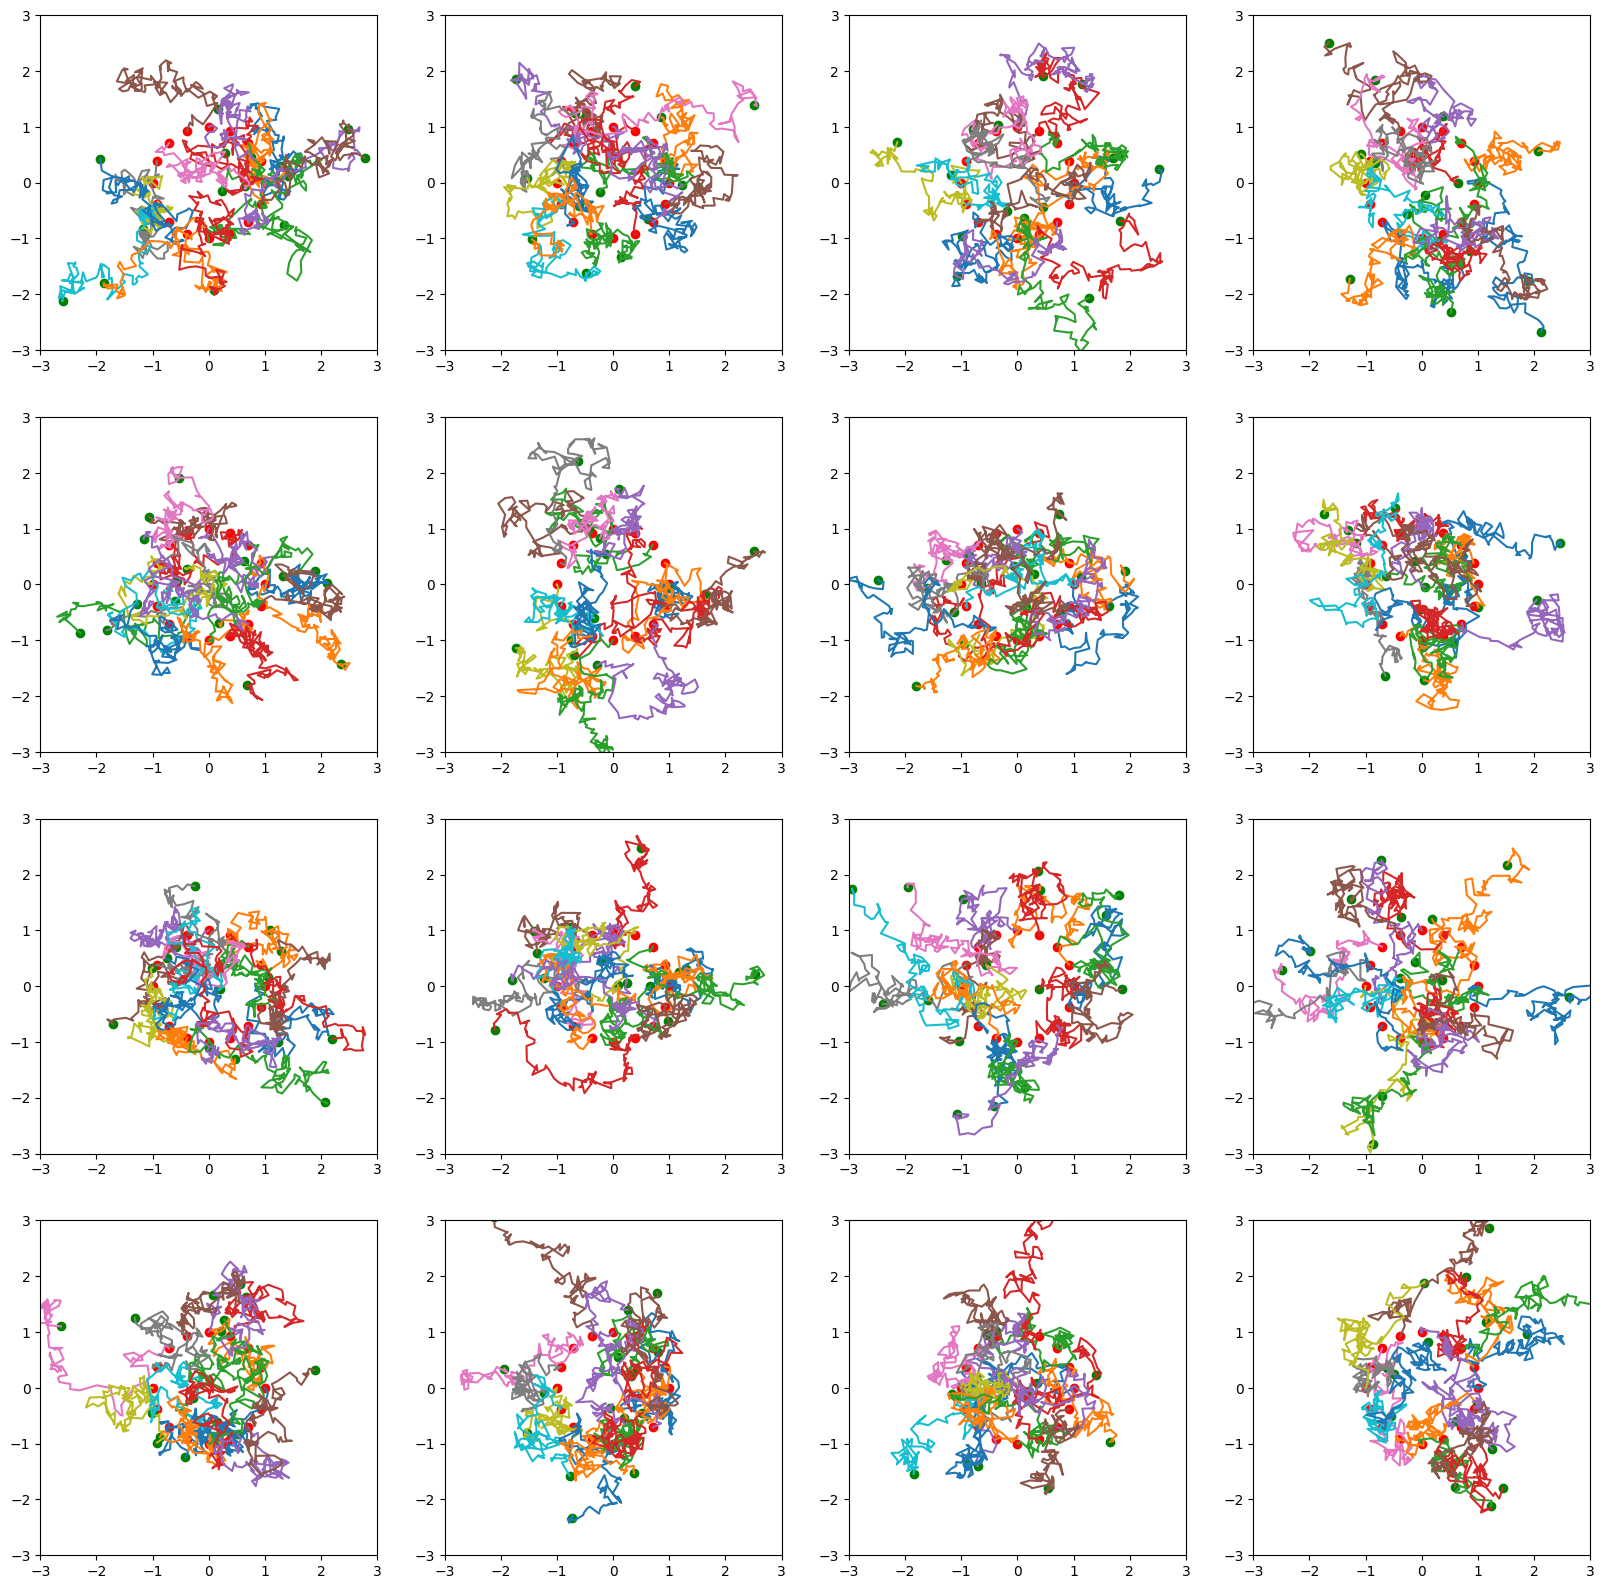

In [16]:
batch = next(iterable_dataset)
trajectories, _ = batch
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()
for i in range(16):
    for j in range(sde.dim//2):
        ax[i].plot(trajectories[i, :, 2*j], trajectories[i, :, 2*j+1])
        ax[i].scatter(trajectories[i, 0, 2*j], trajectories[i, 0, 2*j+1], c="r")
        ax[i].scatter(trajectories[i, -1, 2*j], trajectories[i, -1, 2*j+1], c="g")
        ax[i].set_xlim(-3, 3)
        ax[i].set_ylim(-3, 3)

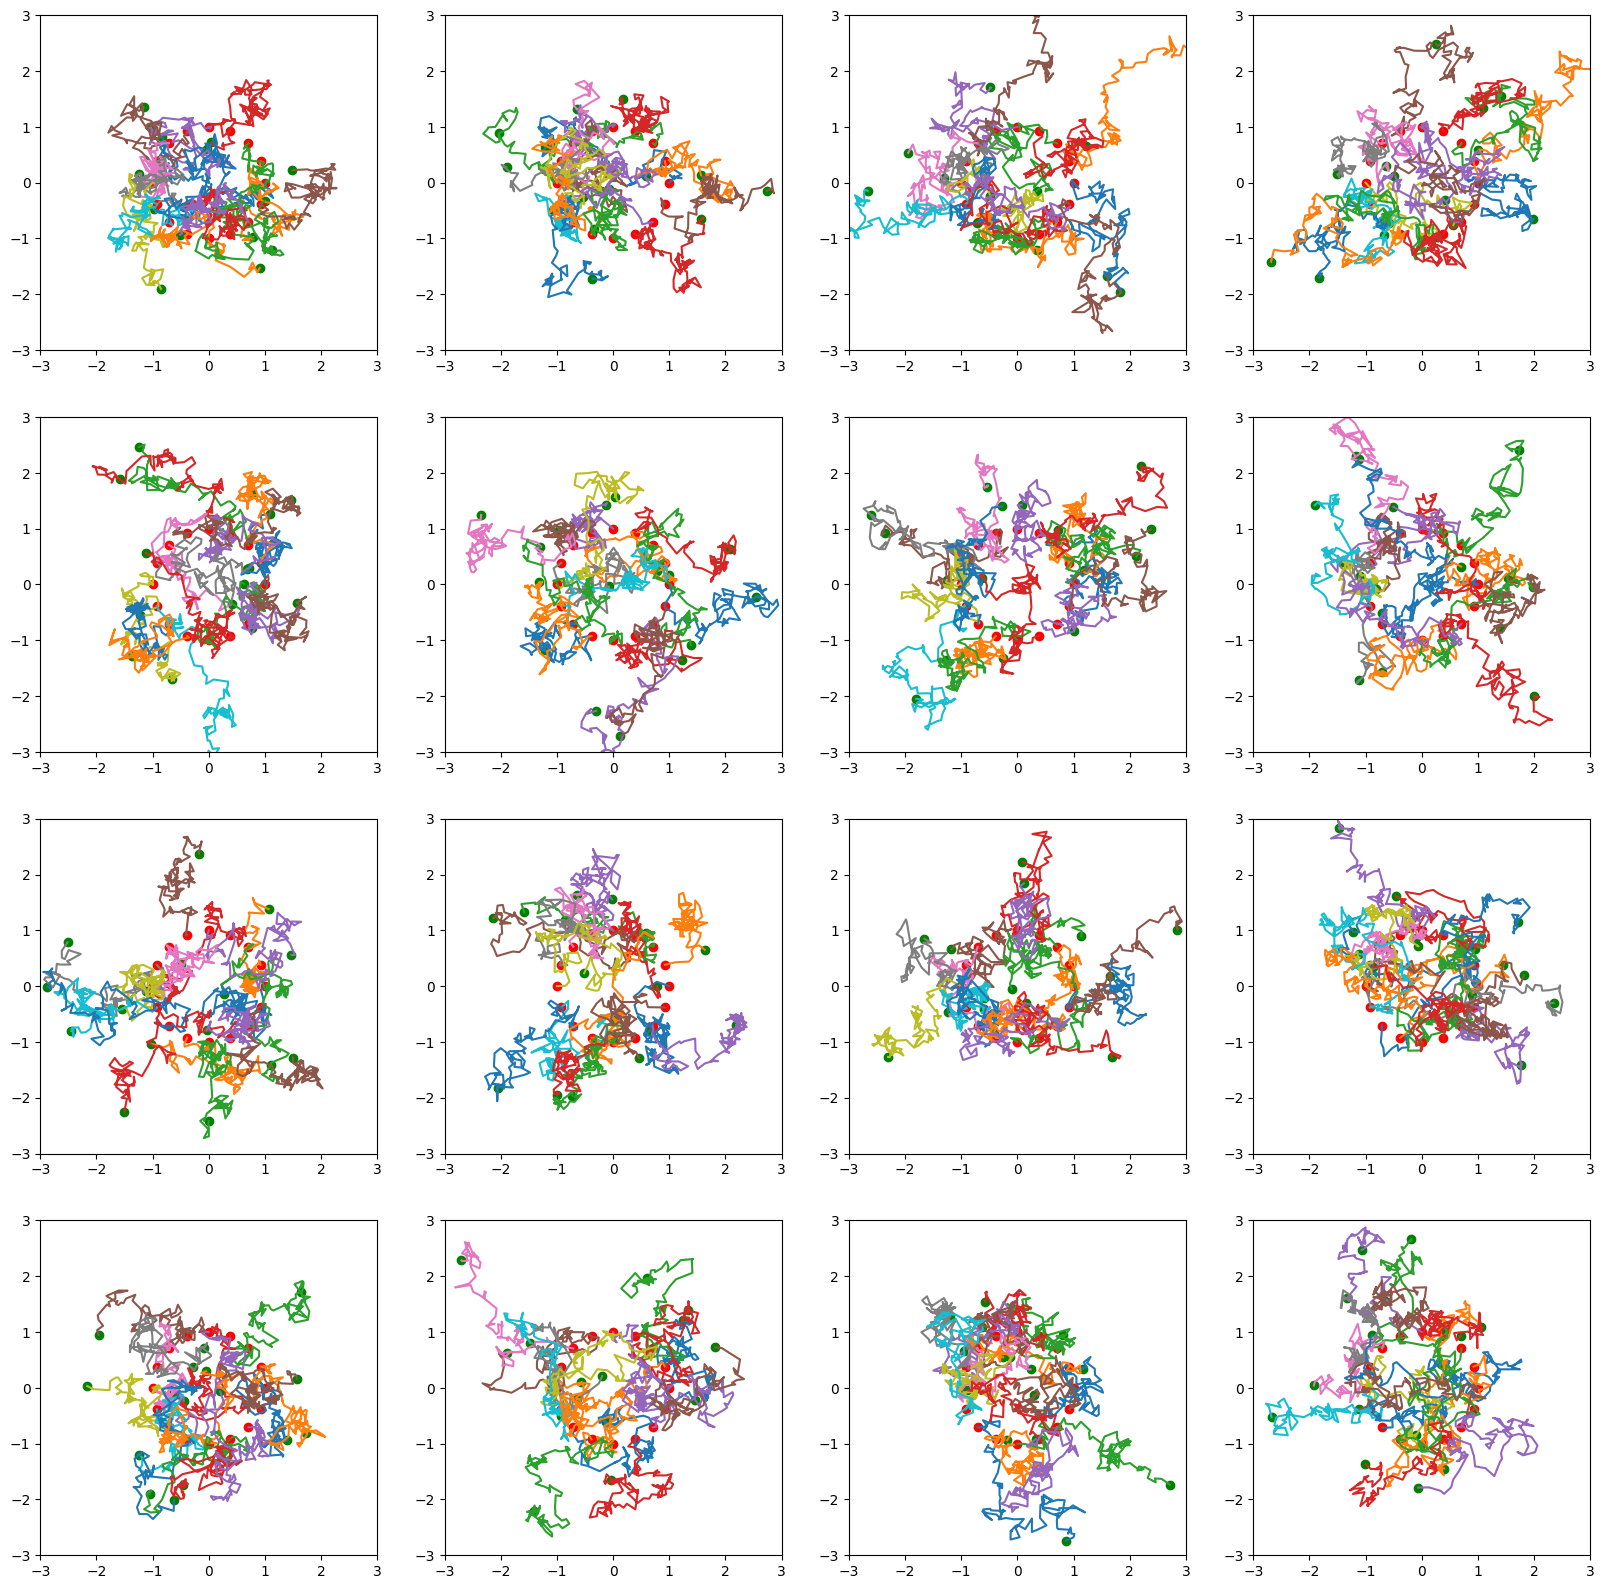

In [17]:
batch = next(iterable_dataset)
trajectories, _ = batch
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()
for i in range(16):
    for j in range(sde.dim//2):
        ax[i].plot(trajectories[i, :, 2*j], trajectories[i, :, 2*j+1])
        ax[i].scatter(trajectories[i, 0, 2*j], trajectories[i, 0, 2*j+1], c="r")
        ax[i].scatter(trajectories[i, -1, 2*j], trajectories[i, -1, 2*j+1], c="g")
        ax[i].set_xlim(-3, 3)
        ax[i].set_ylim(-3, 3)

In [25]:
data_generator = bridge.get_trajectories_generator(
    batch_size=16,
    process_type="backward_bridge",
    initial_val=X0,
    terminal_val=XT,
    score_p=lambda val, time: -(val - X0) / (time + 1e-8),
    score_h=None
)

iterable_dataset = get_iterable_dataset(
    data_generator,
    dtype=(tf.float32, tf.float32),
    shape=[
        (16, sde.N, sde.dim),
        (16, sde.N, sde.dim),
    ],
)

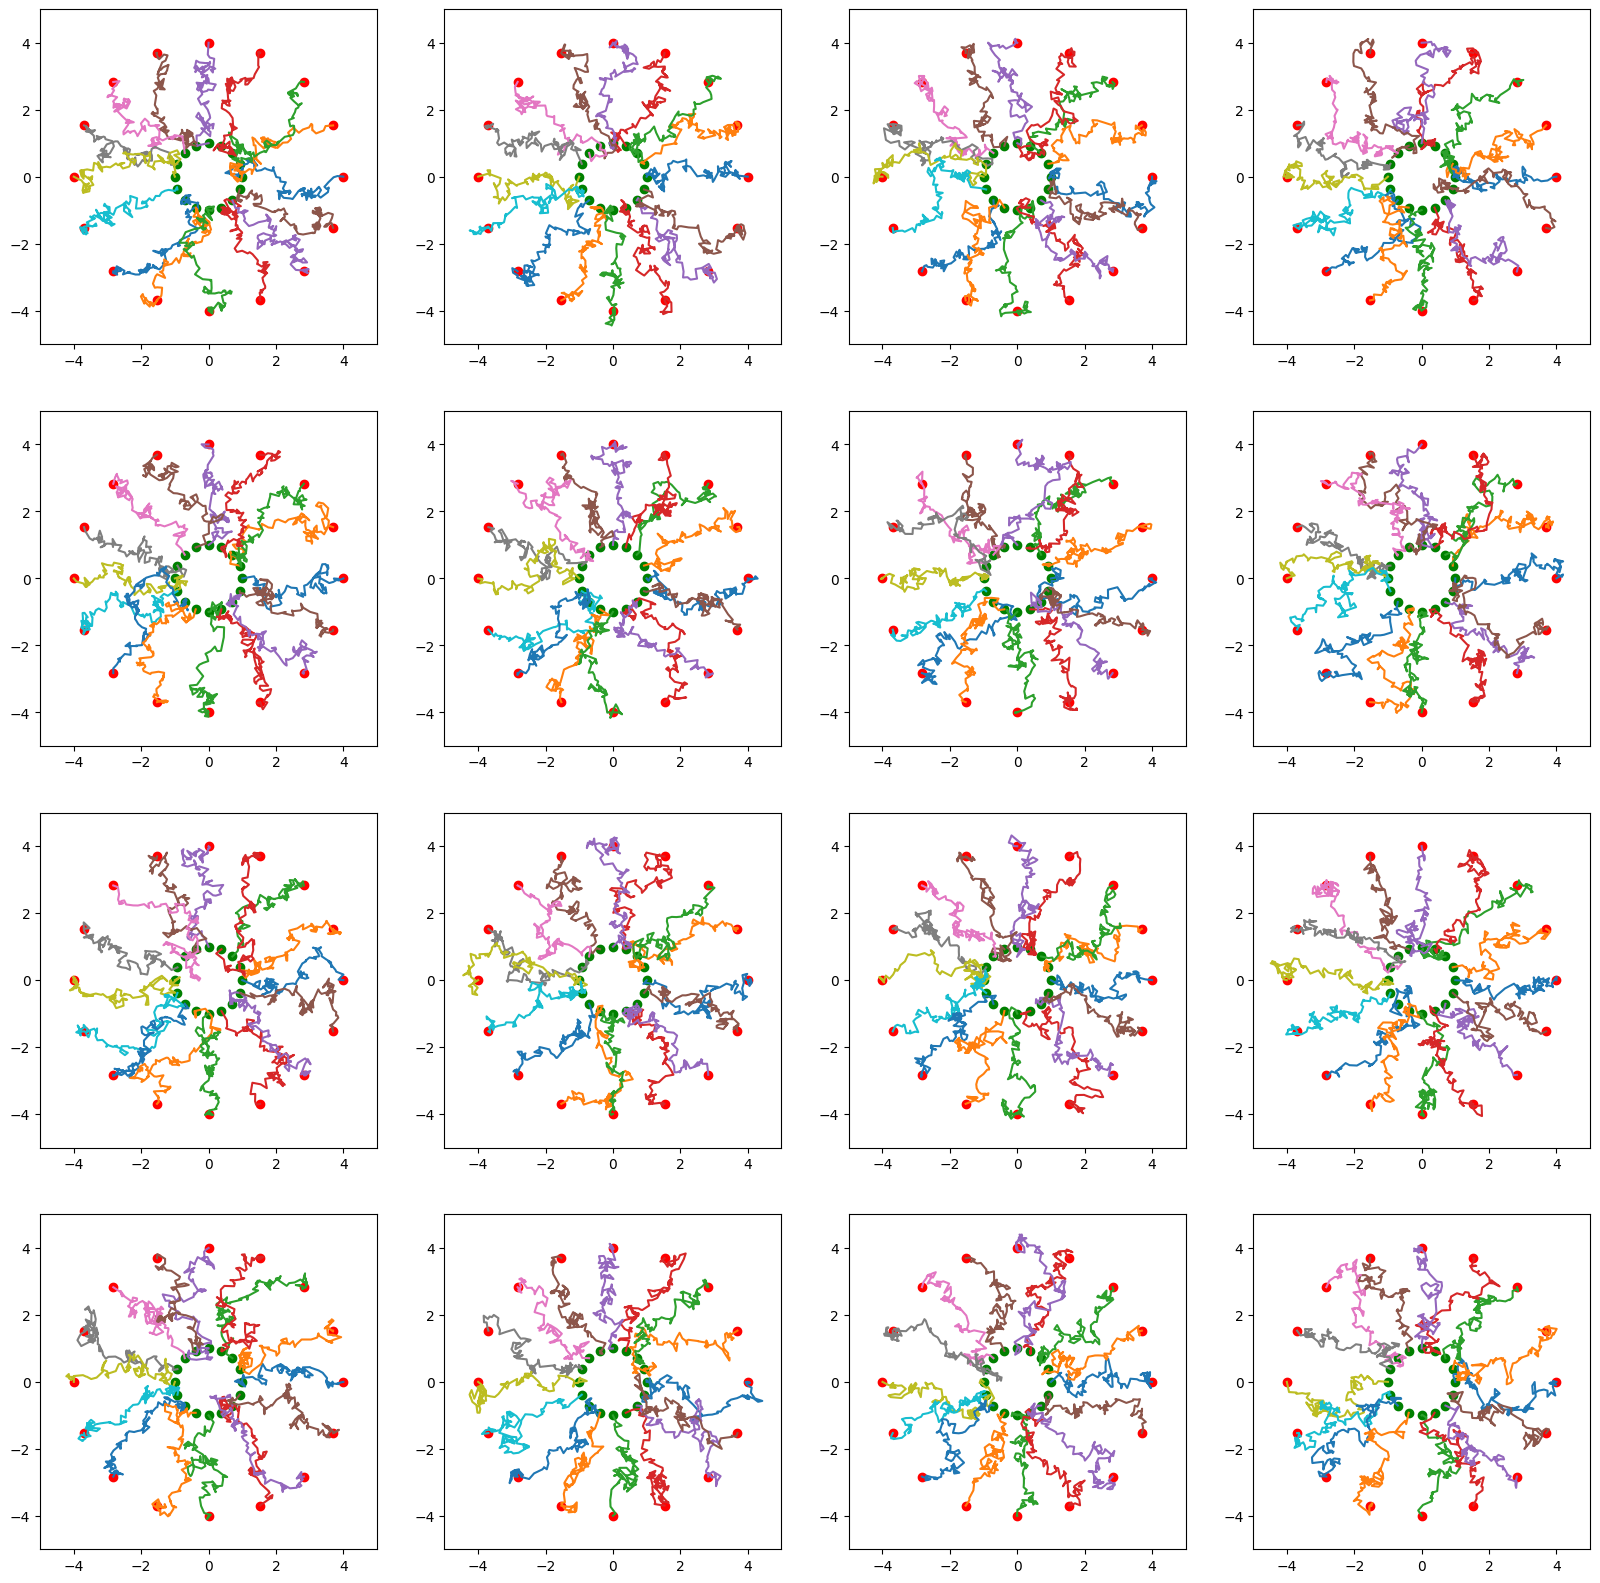

In [26]:
batch = next(iterable_dataset)
trajectories, _ = batch
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()
for i in range(16):
    for j in range(sde.dim//2):
        ax[i].plot(trajectories[i, :, 2*j], trajectories[i, :, 2*j+1])
        ax[i].scatter(trajectories[i, 0, 2*j], trajectories[i, 0, 2*j+1], c="r")
        ax[i].scatter(trajectories[i, -1, 2*j], trajectories[i, -1, 2*j+1], c="g")
        ax[i].set_xlim(-5, 5)
        ax[i].set_ylim(-5, 5)